# Action1

#### 数据加载

In [1]:
import pandas as pd 

In [2]:
train_data = pd.read_csv('cs-training.csv')

##### 数据探索

In [4]:
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


##### 去掉第一列 unnamed

In [6]:
train_data = train_data.iloc[:,1:]
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [7]:
train_data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

##### 数据可视化

In [9]:
import seaborn as sn

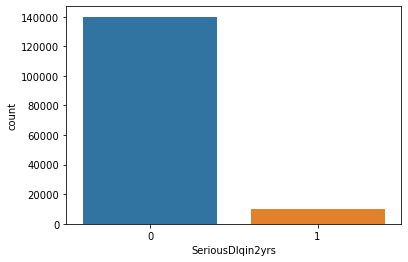

In [10]:
sn.countplot(x= 'SeriousDlqin2yrs', data = train_data)

In [11]:
#违约比例
train_data['SeriousDlqin2yrs'].sum() / len(train_data)

0.06684

In [12]:
##### 缺失值
train_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [13]:
train_data.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [14]:
###使用中位数进行填充
train_data = train_data.fillna(train_data.median())

In [15]:
#检查是否还有缺失值
train_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### 数据分箱

##### 对于age字段，分成6段 [-math.inf, 25, 40, 50, 60, 70, math.inf]

In [16]:
import math

In [17]:
#将age字段进行分箱

In [18]:
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
train_data['bin_age'] = pd.cut(train_data['age'], bins = age_bins)
train_data[['age','bin_age']]

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"
...,...,...
149995,74,"(70.0, inf]"
149996,44,"(40.0, 50.0]"
149997,58,"(50.0, 60.0]"
149998,30,"(25.0, 40.0]"


##### 对于NumberOfDependents（家属人数）字段，分成6段 [-math.inf,2,4,6,8,10,math.inf]

In [19]:
dependent_bins = [-math.inf,2,4,6,8,10,math.inf]

In [20]:
train_data['bin_dependent'] = pd.cut(train_data['NumberOfDependents'], bins = dependent_bins)

In [21]:
train_data[['NumberOfDependents','bin_dependent']]

,NumberOfDependents,bin_dependent
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"
...,...,...
149995,0.0,"(-inf, 2.0]"
149996,2.0,"(-inf, 2.0]"
149997,0.0,"(-inf, 2.0]"
149998,0.0,"(-inf, 2.0]"


##### 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段 

In [22]:
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]

In [23]:
train_data['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(train_data['NumberOfTime30-59DaysPastDueNotWorse'], bins = dpd_bins)
train_data['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(train_data['NumberOfTime60-89DaysPastDueNotWorse'], bins = dpd_bins)
train_data['bin_NumberOfTimes90DaysLate'] = pd.cut(train_data['NumberOfTimes90DaysLate'], bins = dpd_bins)

In [24]:
#查看分箱情况
train_data[['bin_NumberOfTime30-59DaysPastDueNotWorse','bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


##### 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段

In [25]:
train_data['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(train_data['RevolvingUtilizationOfUnsecuredLines'], q =5, duplicates= 'drop')

In [26]:
train_data['bin_DebtRatio'] = pd.qcut(train_data['DebtRatio'], q =5, duplicates= 'drop')
train_data['bin_MonthlyIncome'] = pd.qcut(train_data['MonthlyIncome'], q =5, duplicates= 'drop')
train_data['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(train_data['NumberOfOpenCreditLinesAndLoans'], q =5, duplicates= 'drop')
#train_data['bin_NumberRealEstateLoansOrLines'] = pd.qcut(train_data['NumberRealEstateLoansOrLines'], q =5, duplicates= 'drop')
loan_bins = [-math.inf,0,1,2,3,math.inf]
train_data['bin_NumberRealEstateLoansOrLines'] = pd.cut(train_data['NumberRealEstateLoansOrLines'], bins=loan_bins)

In [27]:
train_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_dependent,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,"(70.0, inf]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0192, 0.0832]","(0.134, 0.287]","(-0.001, 3400.0]","(-0.001, 4.0]","(0.0, 1.0]"
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(0.468, 4.0]","(5400.0, 8250.0]","(-0.001, 4.0]","(0.0, 1.0]"
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,"(50.0, 60.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(4.0, 329664.0]","(3400.0, 5400.0]","(12.0, 58.0]","(0.0, 1.0]"
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(-0.001, 0.0192]","(-0.001, 0.134]","(5400.0, 8250.0]","(-0.001, 4.0]","(-inf, 0.0]"


In [28]:
train_data['bin_NumberRealEstateLoansOrLines'].value_counts()

(-inf, 0.0]    56188
(0.0, 1.0]     52338
(1.0, 2.0]     31522
(2.0, 3.0]      6300
(3.0, inf]      3652
Name: bin_NumberRealEstateLoansOrLines, dtype: int64

### 统计分箱字段

In [30]:
bin_cols = [c for c in train_data.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_dependent',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

##### 计算 IV值

In [31]:
import numpy as np 

In [32]:
def cal_IV (df, feature, target):
    lst = []
    cols = ['Variable','Value','All','Bad']
    #对feature字段的每个分箱值进行遍历
    for i in range(df[feature].nunique()): #nunique 是不同值的个数
        #得到feature字段的第i个分箱取值
        val = list(df[feature].unique())[i]
        #统计feature， feature value的个数以及value导致target = 1 的个数
        lst.append([ feature, val,df[df[feature]==val].count()[feature], df[(df[feature]==val) & (df[target]==1)].count()[feature] ])

    #print(lst)
    data = pd.DataFrame(lst, columns= cols)
    data = data[data['Bad']>0]
    
    data['Share'] = data['All'] / data['All'].sum() #这个value所占的比例
    data['Bad Rate'] = data['Bad'] / data['All'] #这个value导致bad的情况，在该value个数的比例
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'].sum()-data['Bad'].sum()) #好的情况所占的比例
    
    #计算WOE值
    data['woe'] = np.log(data['Margin Bad']/data['Margin Good'])
    
    #计算IV值
    data['iv'] = data['woe'] * (data['Margin Bad'] - data['Margin Good'])
    
    data = data.sort_values(by=['Variable', 'Value'])
    
    return data['iv'].sum()

In [33]:
cal_IV(train_data, 'bin_age','SeriousDlqin2yrs')

0.24041120302785984

#### 计算每个字段的iv值

In [34]:
feature_cols = []
for col in bin_cols:
    iv = cal_IV(train_data, col, 'SeriousDlqin2yrs')
    print(col, iv)
    if iv > 0.1: #选出值超过0.1的字段作为特征字段
        feature_cols.append(col)

bin_age 0.24041120302785984
bin_dependent 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.49244477457019803
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714755
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645


In [35]:
feature_cols

['bin_age',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines']

##### 计算特征的woe

In [38]:
def cal_WOE(df, feature, target):
    df_new = df.copy()
    for f in feature:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad', target+'count':'all'})
        
        #print(df_woe)
        #计算woe值
        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['woe'] = np.log1p(df_woe['margin bad']/ df_woe['margin good'])
        
        #print(df_woe)
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        #print(df_woe)
        df_new = df_new.merge(df_woe, on = f, how = 'left')
    
    return df_new

In [39]:
df_woe = cal_WOE(train_data, bin_cols, 'SeriousDlqin2yrs')

In [40]:
df_woe

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184591,0.184121,0.691873,419,3652,3233,0.023097,0.041791,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.218298,0.309495,0.882845,4672,56188,51516,0.368040,0.465988,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.218298,0.309495,0.882845,4672,56188,51516,0.368040,0.465988,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.178405,0.156892,0.630962,4672,56188,51516,0.368040,0.465988,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.251082,0.201177,0.588475,2748,52338,49590,0.354280,0.274087,0.573037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,...,30556,0.218298,0.309495,0.882845,2748,52338,49590,0.354280,0.274087,0.573037
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,...,30556,0.218298,0.309495,0.882845,2748,52338,49590,0.354280,0.274087,0.573037
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,...,25838,0.184591,0.184121,0.691873,2748,52338,49590,0.354280,0.274087,0.573037
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,...,30556,0.218298,0.309495,0.882845,4672,56188,51516,0.368040,0.465988,0.818076


In [41]:
feature_cols = ['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines']

##### 得到woe规则, features, bin, woe

In [42]:
df_bin_to_woe = pd.DataFrame(columns=['features','bin', 'woe'])

#### 由以下数据我们可以获得一个大致的woe规则，也就是我们的评分卡规则。 影响力比较大的主要有五个字段。
#### 首先是年纪，太年轻和太老的个人承担风险的能力不是很强，因此有可能发生逾期90天以上还债
#### 客户过往的信用往来记录也是很重要的指标，从下面可以看到如果过去又发生长时间的逾期，那么就会成为一个风险区分的明显特征
#### 最后是客户的信用卡余额，一般来说余额越少，发生逾期的可能也越大

In [43]:
for f in feature_cols:
    b = 'bin_' + f
    w = 'woe_bin_' + f 
    df = df_woe[[w,b]].drop_duplicates()
    df.columns= ('woe','bin')
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe,df])

df_bin_to_woe

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848
19,age,"(-inf, 25.0]",1.013134
0,NumberOfTime30-59DaysPastDueNotWorse,"(1.0, 2.0]",1.797837
1,NumberOfTime30-59DaysPastDueNotWorse,"(-inf, 1.0]",0.572521
13,NumberOfTime30-59DaysPastDueNotWorse,"(2.0, 3.0]",2.151185
183,NumberOfTime30-59DaysPastDueNotWorse,"(3.0, 4.0]",2.429111


### 逻辑回归建模

In [44]:
#数据切分
from sklearn.model_selection import train_test_split

In [45]:
#挑选出woe值作为特征
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols

['woe_bin_age',
 'woe_bin_dependent',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size = 0.2, random_state = 45)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.metrics import accuracy_score

In [54]:
model = LogisticRegression(random_state=45).fit(x_train, y_train)

In [55]:
#使用模型预测，然后查看预测的精确值
y_pred = model.predict(x_test)
print(accuracy_score(y_pred, y_test))

0.9365666666666667
